In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from psifr import fr
import swarmbar as sb

from cymr import cmr
from dcmr import framework
from dcmr import figures
from dcmr import task
from dcmr import reports

res_dir = Path(os.environ['CDCFR_RESULTS'])
fit_dir = Path(os.environ['CDCFR_FITS']) / 'switchboard'
fig_dir = Path(os.environ['CDCFR_FIGURES']) / 'plots'

data_file = res_dir / 'data.csv'
patterns_file = res_dir / 'patterns.hdf5'

fig_dir.mkdir(exist_ok=True, parents=True)
figures.set_style()
%matplotlib inline

In [2]:
patterns = cmr.load_patterns(patterns_file)
data = pd.read_csv(data_file).astype({'item_index': 'Int64'})
data.head()

,subject,session,list,trial_type,position,item,category,distractor,item_index
0,201,1,1,study,1,MASCARA,obj,0.0,646
1,201,1,1,study,2,GOLF CLUB,obj,0.0,606
2,201,1,1,study,3,KEYCHAIN,obj,0.0,626
3,201,1,1,study,4,LOS ANGELES,loc,0.0,370
4,201,1,1,study,5,GETTYSBURG,loc,0.0,325


In [3]:
model_names = ['DCMR-Disrupt', 'CMR-MP16-L-Disrupt']
models = ['cmrsit_sem-split_cue-focused_dis-cat_sub-list', 'cmrsit_sem-item_dis-loc_sub-list']
data = framework.read_model_sims(data_file, fit_dir, models, model_names, data_first=True, block=True)
data['Distraction (s)'] = data['distractor'].astype(float)
data.head()

subject  list         item  input  output  study  recall  \
source trial                                                             
Data   0          201     1      MASCARA      1    <NA>   True   False   
       1          201     1    GOLF CLUB      2    <NA>   True   False   
       2          201     1     KEYCHAIN      3    <NA>   True   False   
       3          201     1  LOS ANGELES      4    <NA>   True   False   
       4          201     1   GETTYSBURG      5       9   True    True   

              repeat  intrusion  session  ...  category  block n_block  \
source trial                              ...                            
Data   0           0      False        1  ...       obj      1       6   
       1           0      False        1  ...       obj      1       6   
       2           0      False        1  ...       obj      1       6   
       3           0      False        1  ...       loc      2       6   
       4           0      False        1  ...       loc      2       6   

              block_pos  block_len  curr  prev  next  base Distraction (s)  
source trial                                                                
Data   0              1          3  <NA>  <NA>  <NA>  <NA>             0.0  
       1              2          3  <NA>  <NA>  <NA>  <NA>             0.0  
       2              3          3  <NA>  <NA>  <NA>  <NA>             0.0  
       3              1          3  <NA>  <NA>  <NA>  <NA>             0.0  
       4              2          3  <NA>  <NA>  <NA>  <NA>             0.0  

[5 rows x 22 columns]

In [4]:
curve = sns.color_palette(
    'ch:rot=-.5, light=.6, dark=.3, gamma=1', n_colors=3
)
curve

[(0.44163916703794076, 0.6914342033666265, 0.5414714890673176),
 (0.27424883716016524, 0.5352555384607786, 0.4809527643729599),
 (0.17051215858853222, 0.344636926092434, 0.3959064384004337)]

In [5]:
dark = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.6', n_colors=3
)
dark

[(0.725301473503126, 0.8645990769601404, 0.7363315007817791),
 (0.5016677447743987, 0.7426793533080586, 0.6602162691374847),
 (0.33145894574681245, 0.5393097642399239, 0.6005096167923277)]

In [6]:
light = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.2', n_colors=3
)
light

[(0.8973525746116884, 0.9546730560357413, 0.901891392639006),
 (0.7912737188119296, 0.9119907090651371, 0.870686908851388),
 (0.6820851323976215, 0.8225675908928259, 0.8639314200489312)]

## Serial position effects by distraction

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


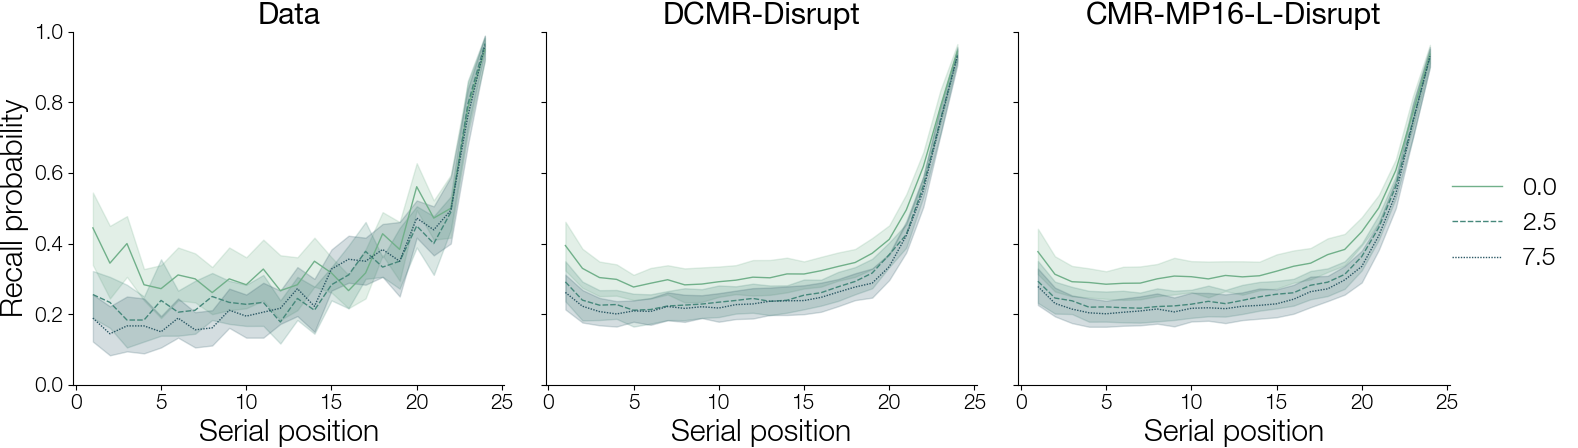

In [7]:
spc = data.groupby(['source', 'Distraction (s)'], sort=False).apply(fr.spc, include_groups=False)
g = fr.plot_spc(
    spc, 
    hue='Distraction (s)', 
    style='Distraction (s)', 
    col='source', 
    palette=curve, 
    height=5,
).add_legend().set_titles('{col_name}')
g.savefig(fig_dir / 'spc_full.pdf')

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


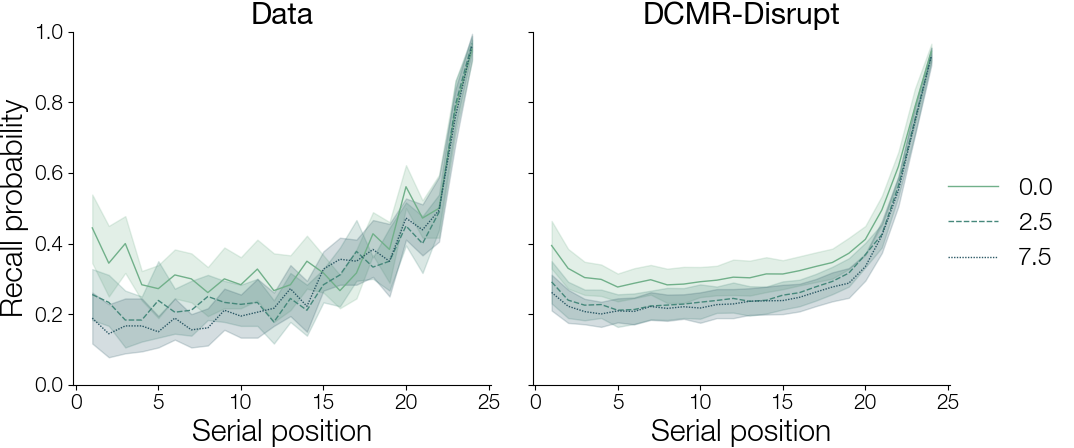

In [8]:
g = fr.plot_spc(
    spc.loc[['Data', 'DCMR-Disrupt']], 
    hue='Distraction (s)', 
    style='Distraction (s)', 
    col='source', 
    palette=curve, 
    height=5
).add_legend().set_titles('{col_name}')
g.savefig(fig_dir / 'spc.pdf')

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


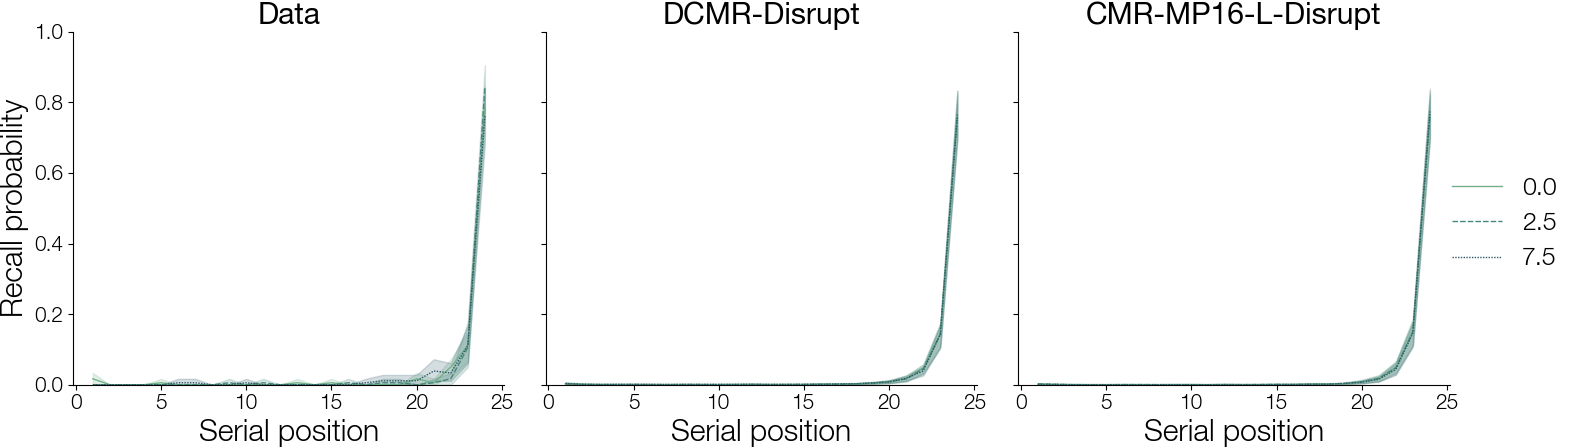

In [9]:
pfr = (
    data.groupby(['source', 'Distraction (s)'], sort=False)
    .apply(fr.pnr, include_groups=False)
    .query('output == 1')
)
g = fr.plot_spc(
    pfr, 
    hue='Distraction (s)', 
    style='Distraction (s)', 
    col='source', 
    palette=curve, 
    height=5
).add_legend().set_titles('{col_name}')
g.savefig(fig_dir / 'pfr_full.pdf')

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


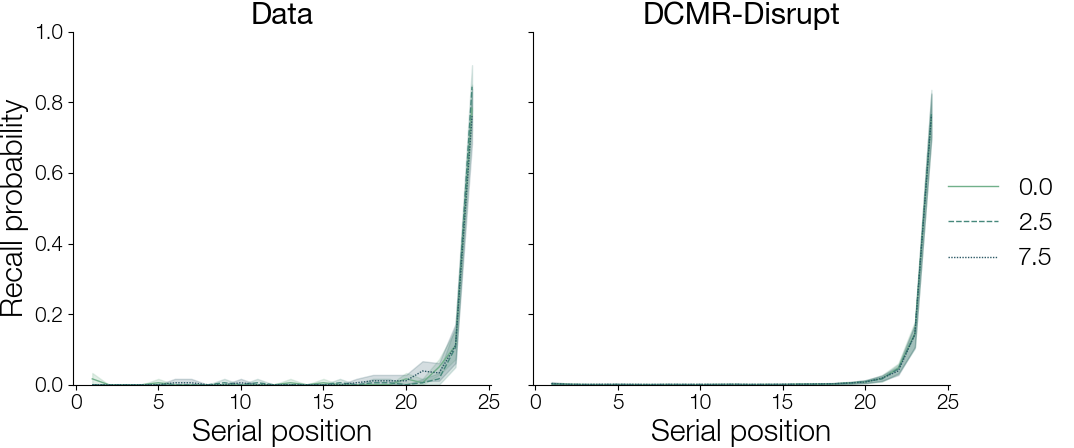

In [10]:
g = fr.plot_spc(
    pfr.loc[['Data', 'DCMR-Disrupt']], 
    hue='Distraction (s)', 
    style='Distraction (s)', 
    col='source', 
    palette=curve, 
    height=5,
).add_legend().set_titles('{col_name}')
g.savefig(fig_dir / 'pfr.pdf')

## Category clustering by distraction

In [11]:
kwargs = {'dark': dark, 'light': light, 'point_kws': {'size': 5}}

In [12]:
clust = (
    data.groupby(['source', 'Distraction (s)'])
    .apply(fr.category_clustering, category_key='category', include_groups=False)
)
clust.groupby(['source', 'Distraction (s)']).agg(['mean', 'sem'])

subject            lbc                 arc  \
                                      mean  sem      mean       sem      mean   
source             Distraction (s)                                              
CMR-MP16-L-Disrupt 0.0               205.9  1.1  1.795720  0.133787  0.424028   
                   2.5               205.9  1.1  1.566077  0.123358  0.442654   
                   7.5               205.9  1.1  1.476382  0.094969  0.453958   
DCMR-Disrupt       0.0               205.9  1.1  2.000435  0.147399  0.463544   
                   2.5               205.9  1.1  1.495000  0.115761  0.434912   
                   7.5               205.9  1.1  1.434734  0.102333  0.439926   
Data               0.0               205.9  1.1  2.180676  0.138734  0.531257   
                   2.5               205.9  1.1  1.422464  0.145531  0.408586   
                   7.5               205.9  1.1  1.465459  0.164687  0.495812   

                                              
                                         sem  
source             Distraction (s)            
CMR-MP16-L-Disrupt 0.0              0.023669  
                   2.5              0.018072  
                   7.5              0.018297  
DCMR-Disrupt       0.0              0.012609  
                   2.5              0.030093  
                   7.5              0.026025  
Data               0.0              0.027473  
                   2.5              0.049215  
                   7.5              0.042237

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


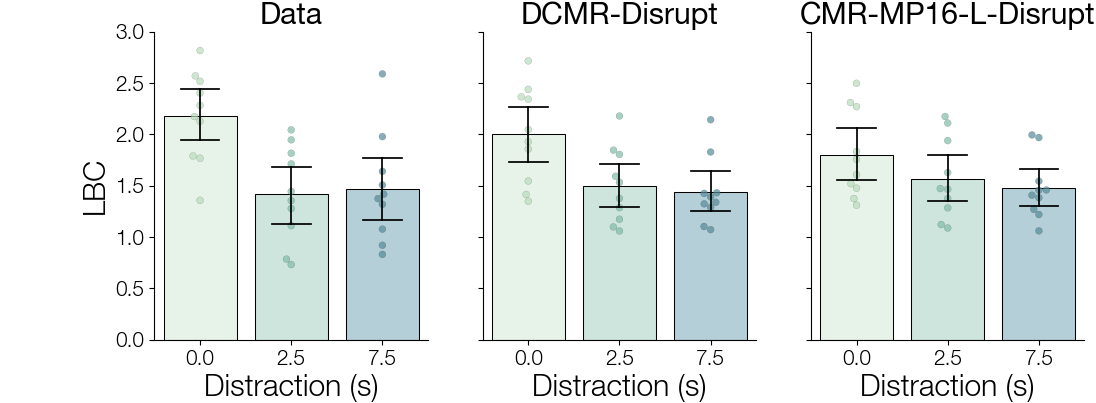

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
sb.plot_swarm_bar(clust.loc['Data'], x='Distraction (s)', y='lbc', hue='Distraction (s)', legend=False, ax=ax[0], **kwargs);
ax[0].set_ylabel('LBC')
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('Distraction (s)')
ax[0].set_title('Data')
ax[0].tick_params(axis='x', labelsize='small')
sb.plot_swarm_bar(clust.loc['DCMR-Disrupt'], x='Distraction (s)', y='lbc', hue='Distraction (s)', legend=False, ax=ax[1], **kwargs);
ax[1].set_xlabel('Distraction (s)')
ax[1].set_title('DCMR-Disrupt')
ax[1].tick_params(axis='x', labelsize='small')
sb.plot_swarm_bar(clust.loc['CMR-MP16-L-Disrupt'], x='Distraction (s)', y='lbc', hue='Distraction (s)', legend=False, ax=ax[2], **kwargs);
ax[2].set_xlabel('Distraction (s)')
ax[2].set_title('CMR-MP16-L-Disrupt')
ax[2].tick_params(axis='x', labelsize='small')
fig.savefig(fig_dir / 'lbc_full.pdf')

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


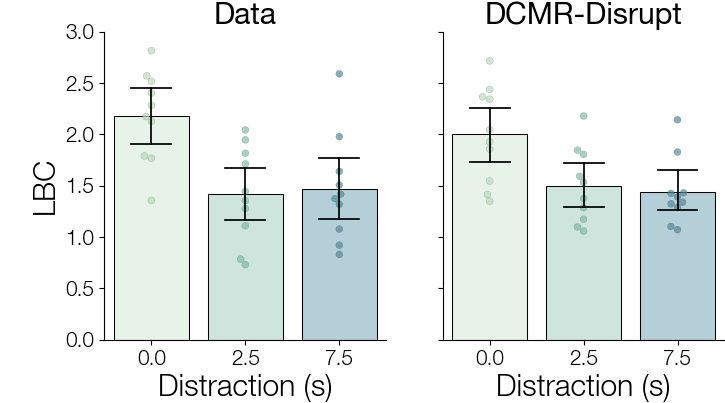

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sb.plot_swarm_bar(clust.loc['Data'], x='Distraction (s)', y='lbc', hue='Distraction (s)', legend=False, ax=ax[0], **kwargs);
ax[0].set_ylabel('LBC')
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('Distraction (s)')
ax[0].set_title('Data')
ax[0].tick_params(axis='x', labelsize='small')
sb.plot_swarm_bar(clust.loc['DCMR-Disrupt'], x='Distraction (s)', y='lbc', hue='Distraction (s)', legend=False, ax=ax[1], **kwargs);
ax[1].set_xlabel('Distraction (s)')
ax[1].set_title('DCMR-Disrupt')
ax[1].tick_params(axis='x', labelsize='small')
fig.savefig(fig_dir / 'lbc.pdf')

In [15]:
p = clust.loc['Data', 'lbc'].unstack().T
pg.ttest(p[0.0], p[7.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.219294,9,two-sided,0.00055,"[0.41, 1.03]",1.485387,67.413,0.985896


In [16]:
p = clust.loc['DCMR-Disrupt', 'lbc'].unstack().T
pg.ttest(p[0.0], p[7.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.676194,9,two-sided,0.001158,"[0.29, 0.84]",1.409882,36.151,0.976518


## Remote category clustering by distraction

In [17]:
clust_remote = (
    data.groupby(['source', 'Distraction (s)'])
    .apply(fr.category_crp, category_key='category', test_key='block', test=lambda x, y: x != y, include_groups=False)
)
clust_remote.groupby(['source', 'Distraction (s)']).agg(['mean', 'sem'])

subject           prob            actual  \
                                      mean  sem      mean       sem    mean   
source             Distraction (s)                                            
CMR-MP16-L-Disrupt 0.0               205.9  1.1  0.278405  0.009731  1319.1   
                   2.5               205.9  1.1  0.277334  0.009915  1058.4   
                   7.5               205.9  1.1  0.274647  0.009095   982.6   
DCMR-Disrupt       0.0               205.9  1.1  0.283915  0.008283  1276.9   
                   2.5               205.9  1.1  0.266680  0.009042  1028.4   
                   7.5               205.9  1.1  0.255085  0.008387   911.1   
Data               0.0               205.9  1.1  0.313398  0.012438    26.4   
                   2.5               205.9  1.1  0.282804  0.020398    21.7   
                   7.5               205.9  1.1  0.266982  0.020051    18.8   

                                               possible              
                                           sem     mean         sem  
source             Distraction (s)                                   
CMR-MP16-L-Disrupt 0.0              107.769450   4724.5  316.186135  
                   2.5              101.729729   3777.3  280.687175  
                   7.5               94.349021   3552.7  281.181003  
DCMR-Disrupt       0.0               97.795984   4469.7  258.477295  
                   2.5              109.222220   3814.2  323.832186  
                   7.5               78.066845   3567.3  282.041843  
Data               0.0                2.329521     83.5    5.281519  
                   2.5                2.624881     76.3    7.223496  
                   7.5                2.289105     68.7    5.187699

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


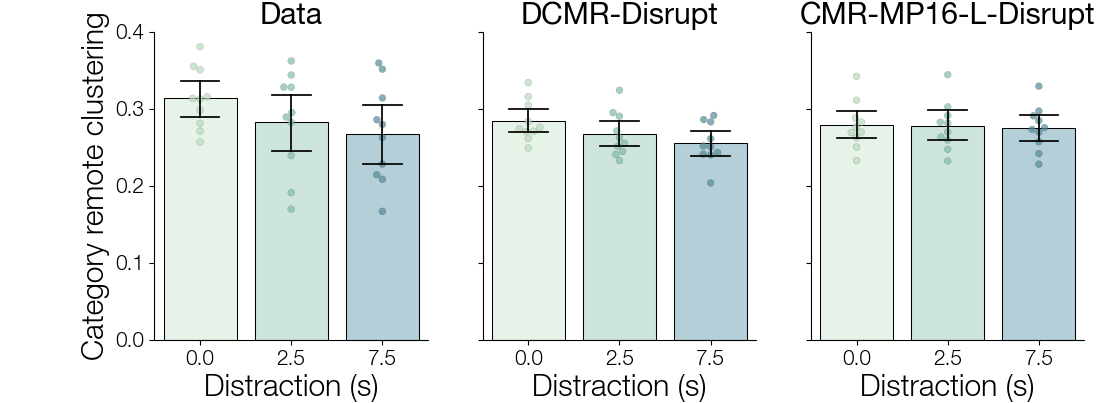

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
sb.plot_swarm_bar(clust_remote.loc['Data'], x='Distraction (s)', y='prob', hue='Distraction (s)', legend=False, ax=ax[0], **kwargs);
ax[0].set_ylabel('Category remote clustering')
ax[0].set_ylim(0, 0.4)
ax[0].set_xlabel('Distraction (s)')
ax[0].set_title('Data')
ax[0].tick_params(axis='x', labelsize='small')
sb.plot_swarm_bar(clust_remote.loc['DCMR-Disrupt'], x='Distraction (s)', y='prob', hue='Distraction (s)', legend=False, ax=ax[1], **kwargs);
ax[1].set_xlabel('Distraction (s)')
ax[1].set_title('DCMR-Disrupt')
ax[1].tick_params(axis='x', labelsize='small')
sb.plot_swarm_bar(clust_remote.loc['CMR-MP16-L-Disrupt'], x='Distraction (s)', y='prob', hue='Distraction (s)', legend=False, ax=ax[2], **kwargs);
ax[2].set_xlabel('Distraction (s)')
ax[2].set_title('CMR-MP16-L-Disrupt')
ax[2].tick_params(axis='x', labelsize='small')
fig.savefig(fig_dir / 'clust_remote_full.pdf')

In [19]:
p = clust_remote.loc['Data', 'prob'].unstack().T
pg.ttest(p[0.0], p[7.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.835326,9,two-sided,0.099649,"[-0.01, 0.1]",0.879721,1.058,0.697766


In [20]:
p = clust_remote.loc['DCMR-Disrupt', 'prob'].unstack().T
pg.ttest(p[0.0], p[7.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.495663,9,two-sided,0.034104,"[0.0, 0.05]",1.093779,2.361,0.867165


## Temporal clustering by distraction

In [21]:
temp = data.groupby(['source', 'Distraction (s)']).apply(
    fr.lag_rank, test_key='category', test=lambda x, y: x == y, include_groups=False
)
temp.groupby(['source', 'Distraction (s)']).agg(['mean', 'sem'])

subject           rank          
                                      mean  sem      mean       sem
source             Distraction (s)                                 
CMR-MP16-L-Disrupt 0.0               205.9  1.1  0.653714  0.007073
                   2.5               205.9  1.1  0.669620  0.008658
                   7.5               205.9  1.1  0.672334  0.009629
DCMR-Disrupt       0.0               205.9  1.1  0.669883  0.006676
                   2.5               205.9  1.1  0.672927  0.013811
                   7.5               205.9  1.1  0.685430  0.011632
Data               0.0               205.9  1.1  0.676020  0.008431
                   2.5               205.9  1.1  0.664947  0.023335
                   7.5               205.9  1.1  0.679256  0.014973

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


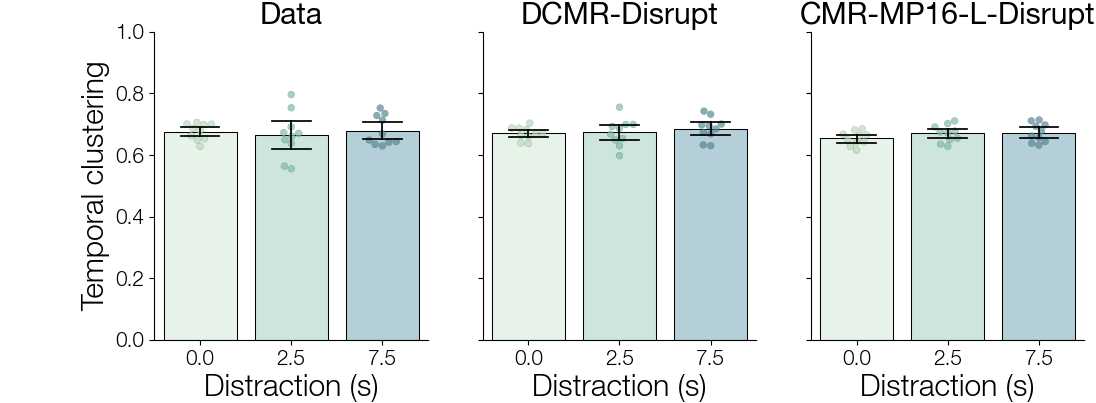

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
sb.plot_swarm_bar(temp.loc['Data'], x='Distraction (s)', y='rank', hue='Distraction (s)', legend=False, ax=ax[0], **kwargs);
ax[0].set_ylabel('Temporal clustering')
ax[0].set_xlabel('Distraction (s)')
ax[0].set_title('Data')
ax[0].tick_params(axis='x', labelsize='small')
ax[0].set_ylim(0, 1)
sb.plot_swarm_bar(temp.loc['DCMR-Disrupt'], x='Distraction (s)', y='rank', hue='Distraction (s)', legend=False, ax=ax[1], **kwargs);
ax[1].set_xlabel('Distraction (s)')
ax[1].set_title('DCMR-Disrupt')
ax[1].tick_params(axis='x', labelsize='small')
sb.plot_swarm_bar(temp.loc['CMR-MP16-L-Disrupt'], x='Distraction (s)', y='rank', hue='Distraction (s)', legend=False, ax=ax[2], **kwargs);
ax[2].set_xlabel('Distraction (s)')
ax[2].set_title('CMR-MP16-L-Disrupt')
ax[2].tick_params(axis='x', labelsize='small')
fig.savefig(fig_dir / 'tempclust_full.pdf')

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


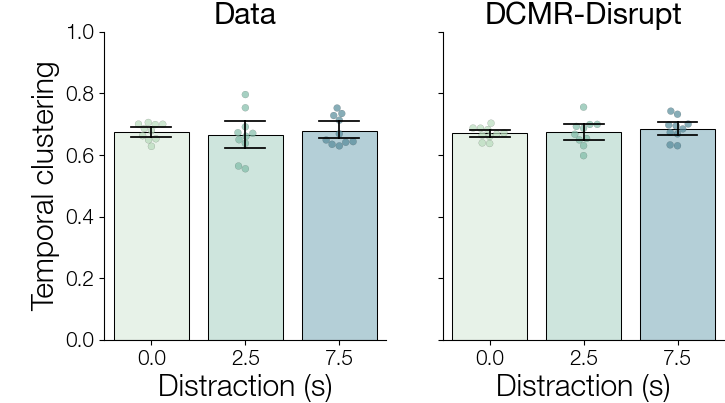

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
sb.plot_swarm_bar(temp.loc['Data'], x='Distraction (s)', y='rank', hue='Distraction (s)', legend=False, ax=ax[0], **kwargs);
ax[0].set_ylabel('Temporal clustering')
ax[0].set_xlabel('Distraction (s)')
ax[0].set_title('Data')
ax[0].tick_params(axis='x', labelsize='small')
ax[0].set_ylim(0, 1)
sb.plot_swarm_bar(temp.loc['DCMR-Disrupt'], x='Distraction (s)', y='rank', hue='Distraction (s)', legend=False, ax=ax[1], **kwargs);
ax[1].set_xlabel('Distraction (s)')
ax[1].set_title('DCMR-Disrupt')
ax[1].tick_params(axis='x', labelsize='small')
fig.savefig(fig_dir / 'tempclust.pdf')

In [24]:
p = temp.loc['Data', 'rank'].unstack().T
pg.ttest(p[0.0], p[7.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.19021,9,two-sided,0.853365,"[-0.04, 0.04]",0.084212,0.314,0.056579


In [25]:
p = temp.loc['DCMR-Disrupt', 'rank'].unstack().T
pg.ttest(p[0.0], p[7.5], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.044366,9,two-sided,0.323555,"[-0.05, 0.02]",0.518429,0.481,0.311179


In [26]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.9.0

cymr      : 0.14.3
dcmr      : 1.0.0a0
matplotlib: 3.10.8
numpy     : 2.4.1
pandas    : 3.0.0
pingouin  : 0.5.5
psifr     : 0.10.1
seaborn   : 0.13.2
swarmbar  : 0.1.0

